In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

from sklearn.tree import DecisionTreeClassifier

import sys
import os

sys.path.append(os.path.abspath("../.."))

from utils.evaluation import Evaluation
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from collections import Counter


pd.set_option("display.max_columns", None)

In [2]:
path = "../../data/diabetes_processed_dataset.csv"

df = pd.read_csv(path)

In [3]:
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
encoder = TargetEncoder(cols=['location'])
X_train['location'] = encoder.fit_transform(X_train['location'], y_train)
X_test['location'] = encoder.transform(X_test['location'])

In [6]:
tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

Accuracy: 0.9515


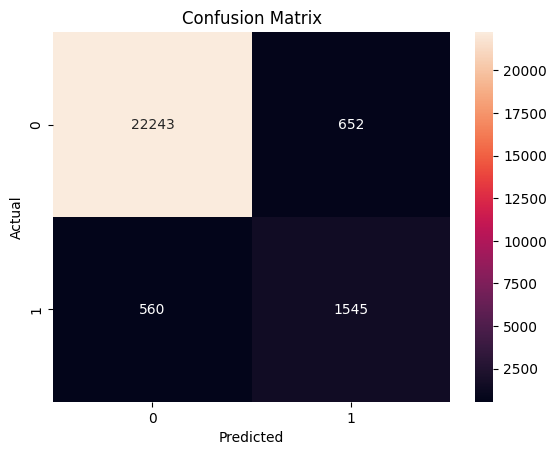

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22895
           1       0.70      0.73      0.72      2105

    accuracy                           0.95     25000
   macro avg       0.84      0.85      0.85     25000
weighted avg       0.95      0.95      0.95     25000



In [7]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)

In [8]:
counter = Counter(y_train)
print('Before', counter)

Before Counter({0: 68605, 1: 6395})


In [9]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

In [10]:
counter = Counter(y_train_sm)
print('After', counter)

After Counter({0: 68605, 1: 68605})


In [11]:
tree = DecisionTreeClassifier(random_state=42)

tree.fit(X_train_sm, y_train_sm)
y_pred = tree.predict(X_test)

Accuracy: 0.9487


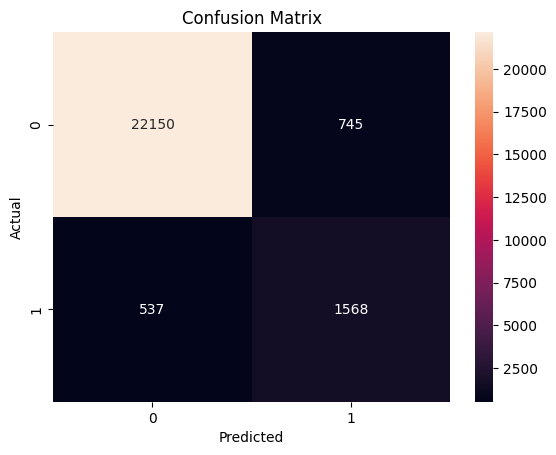

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22895
           1       0.68      0.74      0.71      2105

    accuracy                           0.95     25000
   macro avg       0.83      0.86      0.84     25000
weighted avg       0.95      0.95      0.95     25000



In [12]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)

In [13]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [14]:
tree = DecisionTreeClassifier(random_state=42)

In [15]:
grid_search = GridSearchCV(tree, param_grid, n_jobs=1, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_sm, y_train_sm)

print(f"Melhores parâmetros:\n {grid_search.best_params_}")


Fitting 5 folds for each of 3072 candidates, totalling 15360 fits
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.2s
[CV] END class_weight=None, criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END

c:\Users\guilh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3840 fits failed out of a total of 15360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3840 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\guilh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\guilh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\guilh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

Melhores parâmetros:
 {'class_weight': None, 'criterion': 'entropy', 'max_depth': 40, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


In [16]:
tree = DecisionTreeClassifier(
    criterion='entropy',
    splitter='random',
    max_depth= 40,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features=None,
    class_weight=None,
    random_state=42
)

In [17]:
tree.fit(X_train_sm, y_train_sm)
y_pred = tree.predict(X_test)

In [ ]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)